In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
plt.rcParams["figure.figsize"] = (10, 6)

## The modifications of the data set (data1 =modeling_numeric.csv)

  ### We have to drop some unnecessary columns that we saw in the feature_importances_.
    * "R_fighter","B_fighter","Referee","date","location","R_draw","B_draw","no_of_rounds","R_wins","B_wins",
    * "R_losses","B_losses","B_total_title_bouts","R_total_title_bouts","R_total_rounds_fought","B_total_rounds_fought",           * "R_total_time_fought(seconds)","B_total_time_fought(seconds)","R_longest_win_streak","B_longest_win_streak",
    * "R_current_lose_streak","B_current_lose_streak",'R_win_by_Decision_Majority','R_win_by_Decision_Split',
    * 'R_win_by_Decision_Unanimous', 'R_win_by_KO/TKO',"R_win_by_Submission','R_win_by_TKO_Doctor_Stoppage',
    * "B_current_win_streak",'B_win_by_Decision_Majority','B_win_by_Decision_Split','B_win_by_Decision_Unanimous',
    * 'B_win_by_KO/TKO', 'B_win_by_Submission','B_win_by_TKO_Doctor_Stoppage',"title_bout",
    * "R_current_win_streak",'R_Stance','B_Stance',"title_bout","weight_diff_red-blue", "height_diff_red-blue"
    
 ### We applied an OrdinalEncoder to the weight_class
 ### We dropped from winner the Draw results because did not help us for the prediction and after we chaged to binary  1=Red Winner , 0= Blue Winner
 ### In this data set all the Null values were replaced and deleted.

In [3]:
data1=pd.read_csv("data/modeling_numeric.csv", index_col=None) # Less Columns

In [4]:
data1.head()

,Winner,title_bout,weight_class,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,...,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,weight_diff_red-blue,height_diff_red-blue
0,1,1,4,9.200000,6.000000,0.200000,0.000000,62.600000,20.600000,2.600000,...,0.050000,110.500000,43.300000,162.56,162.56,135.0,31.0,32.0,0.0,-5.08
1,1,1,3,14.600000,9.100000,11.800000,7.300000,124.700000,42.100000,2.400000,...,0.147143,158.142857,82.285714,165.10,167.64,125.0,32.0,31.0,0.0,-2.54
2,1,0,8,15.354839,11.322581,6.741935,4.387097,84.741935,38.580645,5.516129,...,0.131333,102.133333,38.600000,180.34,193.04,155.0,36.0,35.0,0.0,-5.08
3,0,0,4,17.000000,14.000000,13.750000,11.000000,109.500000,48.750000,13.000000,...,0.000000,115.125000,48.875000,162.56,172.72,135.0,26.0,29.0,0.0,-7.62
4,0,0,12,17.000000,14.500000,2.500000,2.000000,201.000000,59.500000,0.000000,...,0.000000,60.500000,27.750000,187.96,190.50,264.0,32.0,26.0,14.0,7.62


In [5]:
data1.drop(columns=[ "title_bout","weight_diff_red-blue","height_diff_red-blue"], inplace=True)

In [7]:
data1.isnull().sum()

Winner               0
weight_class         0
B_avg_BODY_att       0
B_avg_BODY_landed    0
B_avg_CLINCH_att     0
                    ..
R_Height_cms         0
R_Reach_cms          0
R_Weight_lbs         0
B_age                0
R_age                0
Length: 106, dtype: int64

In [8]:
# load decomposition to do PCA analysis with sklearn
from sklearn import decomposition

In [9]:
X=data1.drop('Winner',axis=1,inplace=False)

In [10]:
pca = decomposition.PCA(n_components=4)
pc = pca.fit_transform(X)
pc= pca.transform(X)
pc.shape

(3307, 4)

In [11]:
pca_df1=pd.DataFrame(pc,columns=["pc"+str(i) for i in range(pc.shape[1])])

In [12]:
pca_df1["Winner"]= data1["Winner"]

In [13]:
pca_df1.head()

,pc0,pc1,pc2,pc3,Winner
0,9.952101,95.152879,23.723167,-37.352691,1
1,225.032541,14.689735,15.865838,-30.506059,1
2,109.919697,52.287426,-14.883917,2.508876,1
3,170.164783,5.326285,-19.434983,-44.566591,0
4,247.772483,-264.547396,-86.666220,134.639173,0


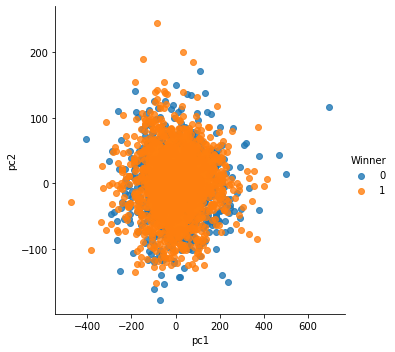

In [14]:
sns.lmplot(x="pc1", y="pc2",hue="Winner",data=pca_df1, fit_reg=False);

In [15]:
pca.explained_variance_

array([16050.67256565,  9911.14970405,  2076.52063689,  1860.68511595])

In [16]:
pca.components_

array([[-1.03672447e-02,  3.28495949e-02,  2.06402589e-02,
         1.85419517e-02,  1.19135954e-02,  2.64234900e-01,
         9.89128809e-02, -3.36110622e-03, -2.08346630e-03,
         2.24820516e-01,  7.10176179e-02, -8.90349245e-05,
         2.17456341e-02,  1.70851332e-02, -6.79812420e-04,
        -3.75044600e-05,  2.79415745e-01,  1.08743010e-01,
        -1.54652500e-04, -7.84269782e-04,  1.70963766e-03,
         2.99786473e-05, -1.14927436e-04,  2.89017384e-01,
         1.16103103e-01,  3.31461906e-02,  2.04521288e-02,
         1.63874269e-02,  1.07417018e-02,  2.63720559e-01,
         9.25657437e-02, -9.63729914e-04, -3.26062551e-04,
         2.25583598e-01,  6.63059352e-02, -9.11452518e-05,
         2.04144680e-02,  1.62233189e-02,  4.13447350e-06,
        -1.12723651e-04,  2.79144256e-01,  1.02981383e-01,
        -1.30401423e-04, -4.38489102e-04,  5.33588308e-03,
         1.04887626e-03, -5.77427814e-05,  2.84268065e-01,
         1.05680119e-01, -2.66746531e-02, -3.13150136e-0

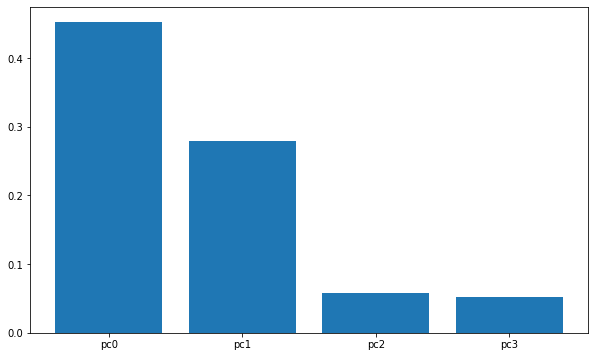

In [17]:
plt.bar(x=["pc"+str(i) for i in range(pc.shape[1])], height=pca.explained_variance_ratio_);